#Задача классификации

**ДЗ к 24.10.2022**

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных

# 0. Описание задачи
Контекст и содержание

Компания хочет нанять специалистов по обработке данных из числа людей, успешно прошедших некоторые курсы, которые проводит компания. Компания хочет знать, кто из этих кандидатов действительно хочет работать в компании после обучения или ищет новую работу.

# 1. Загрузка данных

In [2]:
url = "https://raw.githubusercontent.com/Marina-Labinskaya/Machine-learning-2022/main/aug_train.csv"
data_raw = pd.read_csv(url)

Первые и последние значения из таблицы данных:

In [3]:
data_raw

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


Количество объектов:

In [4]:
data_raw.shape[0]


19158

Количество признаков у каждого объекта:

In [5]:
data_raw.shape[1]

14

Выведем информацию о датасете:

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Отсюда видно, что имеются следующие признаки:


* enrollee_id - Уникальный идентификатор кандидата
* city - Код города
* city_development_index - индекс развития города
* gender - Пол кандидата
* relevent_experience - Соответствующий опыт кандидата
* enrolled_university - Тип зачисленного университетского курса, если таковой имеется
* education_level - Уровень образования кандидата
* major_discipline - Образование, основная дисциплина кандидата 
* experience - Общий стаж кандидата в годах
* company_size - Количество сотрудников в компании текущего работодателя
* company_type - Тип текущего работодателя
* last_new_job - Разница в годах между предыдущей работой и текущей работой
* training_hours - завершенные часы обучения
* target - цель: 0 – Не ищу смены работы, 1 – Ищу смену работы

Категориальные признаки: enrollee_id, city, gender, relevent_experience, enrolled_university,
education_level, major_discipline, experience, company_size, company_type,
last_new_job

Количественные признаки: city_development_index, training_hours

Бинарный признак: target - отнесем его к категориальным.

Для категориальных признаков изменим тип с типа object на тип category:

In [7]:
data_raw['enrollee_id'] = data_raw['enrollee_id'].astype('category')

In [8]:
data_raw['city'] = data_raw['city'].astype('category')

In [9]:
data_raw['gender'] = data_raw['gender'].astype('category')

In [10]:
data_raw['relevent_experience'] = data_raw['relevent_experience'].astype('category')

In [11]:
data_raw['enrolled_university'] = data_raw['enrolled_university'].astype('category')

In [12]:
data_raw['education_level'] = data_raw['education_level'].astype('category')

In [13]:
data_raw['major_discipline'] = data_raw['major_discipline'].astype('category')

In [14]:
data_raw['experience'] = data_raw['experience'].astype('category')

In [15]:
data_raw['company_size'] = data_raw['company_size'].astype('category')

In [16]:
data_raw['company_type'] = data_raw['company_type'].astype('category')

In [17]:
data_raw['last_new_job'] = data_raw['last_new_job'].astype('category')

In [18]:
data_raw['target'] = data_raw['target'].astype('category')

Проверим тип категориальных признаков:

In [19]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             19158 non-null  category
 1   city                    19158 non-null  category
 2   city_development_index  19158 non-null  float64 
 3   gender                  14650 non-null  category
 4   relevent_experience     19158 non-null  category
 5   enrolled_university     18772 non-null  category
 6   education_level         18698 non-null  category
 7   major_discipline        16345 non-null  category
 8   experience              19093 non-null  category
 9   company_size            13220 non-null  category
 10  company_type            13018 non-null  category
 11  last_new_job            18735 non-null  category
 12  training_hours          19158 non-null  int64   
 13  target                  19158 non-null  category
dtypes: category(12), float

# 2. Визуализация данных и вычисление основных характеристик (среднее, разброс, корреляционную матрицу и т.д.). Интерпретация полученных результатов.

Выведем все диаграммы рассеивания для количественных признаков.

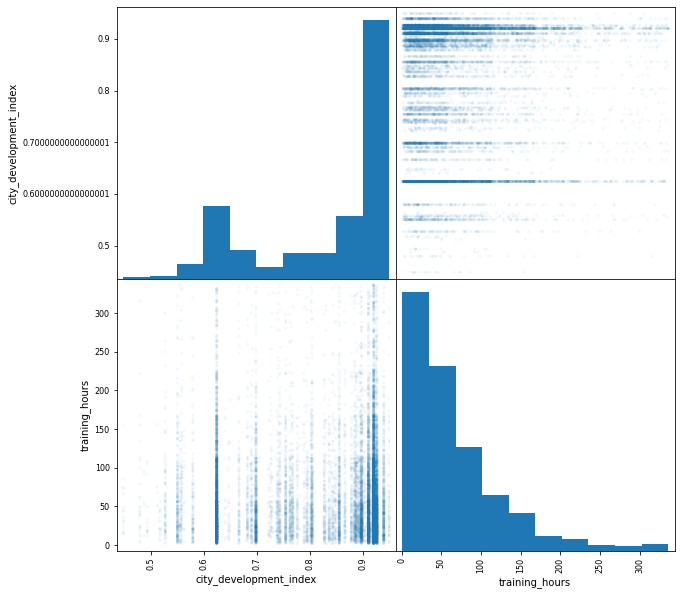

In [20]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 10), alpha = 0.05)
pass

Посмотрим, как соотносится количество людей, ищущих смену работы, и тех, кто не ищет (признак target)

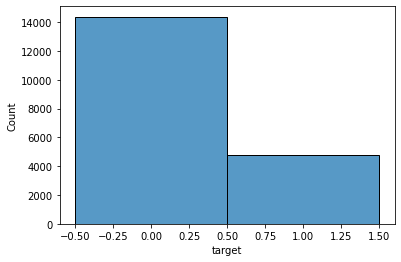

In [21]:
sns.histplot(x = 'target', data = data_raw)
pass

Из гистограммы видно, что классы несбалансированы - найдём их точное соотношение.

In [22]:
data_raw['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

Люди, не ищущие смену работы (в %):




In [23]:
data_raw['target'].value_counts()[0] / (data_raw['target'].value_counts()[0] + data_raw['target'].value_counts()[1]) * 100

75.06524689424784

Люди, ищущие смену работы (в %):

In [24]:
(1 - data_raw['target'].value_counts()[0] / (data_raw['target'].value_counts()[0] + data_raw['target'].value_counts()[1])) * 100

24.93475310575216

Вычислим основные статистические характеристики:

* mean - среднее значение
* std - стандартное отклонение
* min - минимум
* 25% - нижнее значение первого квантиля
* 50% - медиана
* 75% - верхнее значение первого квантиля
* max - максимум

In [25]:
data_raw.describe()

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


**city_development_index:**

На основе полученных данных можно увидеть, что кандидаты на работу из достаточно развитых городов (среднее значение развития городов, из которых кандидаты - 0.828848)

**training_hours**:	

В среднем кандидаты обучались 65 часов, при этом 50% обучались 47 часов или меньше, а 75% - 88 часов и меньше. Значит, существует небольшое количество людей, которые обучались очень большое количество часов по сравнению с основным количеством кандидатов). Максимальное количество часов - 336.

**Борьба с выбросами**

Представим данные в виде ящика с усами.


Ящик с усами (бокс-диаграмма) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

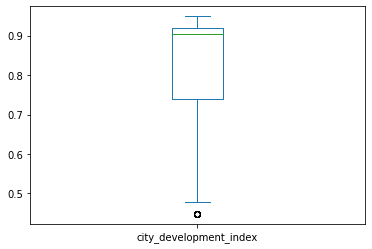

In [26]:
data_raw['city_development_index'].plot(kind='box')
pass

In [27]:
data_raw['city_development_index'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.527
0.010    0.550
0.050    0.624
0.100    0.624
0.500    0.903
0.900    0.925
0.950    0.926
0.990    0.939
0.995    0.939
Name: city_development_index, dtype: float64

$99\%$ всех значений `'city_development_index'` находится в диапазоне от $0.527$ до $0.939$ кв. м.

Удалим все строки таблицы, в которых `'city_development_index'`выходят за пределы квантилей $0.005$, $0.995$.

In [28]:
rows_to_drop = data_raw[
    (data_raw['city_development_index'] < data_raw['city_development_index'].quantile(0.005)) | (data_raw['city_development_index'] > data_raw['city_development_index'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(18993, 14)

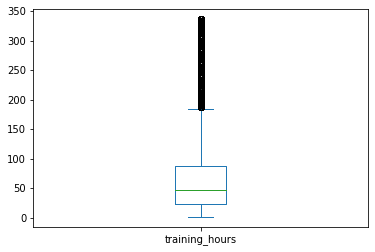

In [29]:
data_raw['training_hours'].plot(kind='box')
pass

In [30]:
data_raw['training_hours'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      2.0
0.010      3.0
0.050      7.0
0.100     11.0
0.500     47.0
0.900    146.0
0.950    188.0
0.990    302.0
0.995    320.0
Name: training_hours, dtype: float64

Для этого признака нельзя сказать, что значения training_hours, которые больше верхнего значения первого квантиля, являются выбросами, скорее это обусловлено реальной ситуацией, что малое количество людей много и систематично обучаются, а большое количество людей проходили только "основы основ".

На гистограмме представлено количество кандитатов в зависимости от количества часов обучения.

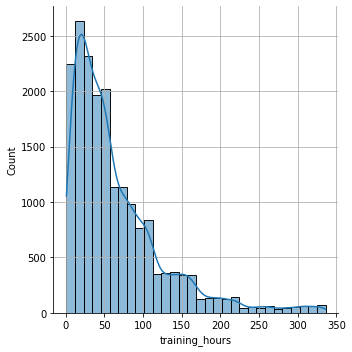

In [31]:
sns.displot(data['training_hours'], bins=30, kde=True)
plt.grid()
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [32]:
corr_mat = data_raw.corr()
corr_mat

,city_development_index,training_hours
city_development_index,1.00000,0.00192
training_hours,0.00192,1.00000


В цветном формате:

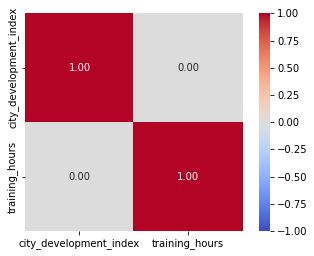

In [33]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Вывод: корреляция между количественными признаками отсутствует.

Далее рассмотрим категориальные признаки.

Посмотрим, сколько раз некоторые номинальные переменные принимают то или иное значение.

In [34]:
data_raw['city'].value_counts() 

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_129       3
city_121       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

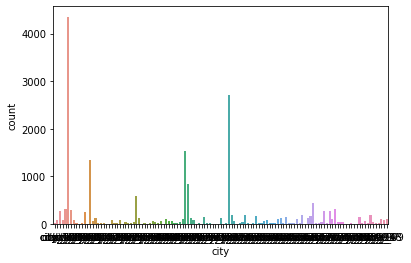

In [35]:
sns.countplot(x='city', data=data_raw)
pass

По гистограмме можно понять, что бо'льшая часть кандидатов из 4-6 городов - скорее всего, это крупные города-миллионники.

In [36]:
data_raw['gender'].value_counts() 

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

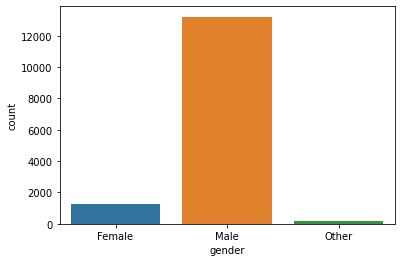

In [37]:
sns.countplot(x='gender', data=data_raw)
pass

Больше всего кандидатов - мужчины, примерно в 7 раз больше, чем женщин.

In [38]:
data_raw['relevent_experience'].value_counts() 

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

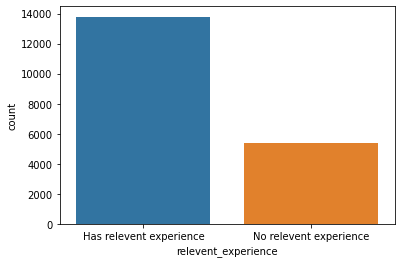

In [39]:
sns.countplot(x='relevent_experience', data=data_raw)
pass

Примерно 2/3 кандидатов ответили, что имеют соответствующий опыт.

In [40]:
data_raw['experience'].value_counts() 

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

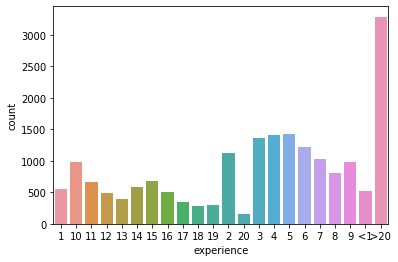

In [41]:
sns.countplot(x='experience', data=data_raw)
pass

Больше всего кандидатов, которые имеют стаж >20 лет.

# 3. Обработка пропущенных значений

Пропущенные значения в таблице представлены значениями np.nan.

In [42]:
data_raw.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Посчитаем, какое количество пропущенных значений в датасете:

In [43]:
sum_missing_cells = data_raw["gender"].isna().sum() + data_raw["enrolled_university"].isna().sum() + data_raw["education_level"].isna().sum() + data_raw["major_discipline"].isna().sum() + data_raw["experience"].isna().sum() + data_raw["company_size"].isna().sum() + data_raw["company_type"].isna().sum() + data_raw["last_new_job"].isna().sum()
sum_missing_cells

20733

Количество пропущенных значений в %:

In [44]:
percent_missing_cells = (sum_missing_cells) / (data_raw.shape[0] * data_raw.shape[1]) * 100
percent_missing_cells

7.730079191087647

Заметим, что пропущенные значения присутствуют только в номинальных признаках.

Категориальные пропущенные значения заменим модой:

In [45]:
data_raw['gender'].fillna(data_raw['gender'].mode().iloc[0], inplace=True)
data_raw['enrolled_university'].fillna(data_raw['enrolled_university'].mode().iloc[0], inplace=True)
data_raw['education_level'].fillna(data_raw['education_level'].mode().iloc[0], inplace=True)
data_raw['major_discipline'].fillna(data_raw['major_discipline'].mode().iloc[0], inplace=True)
data_raw['experience'].fillna(data_raw['experience'].mode().iloc[0], inplace=True)
data_raw['company_size'].fillna(data_raw['company_size'].mode().iloc[0], inplace=True)
data_raw['company_type'].fillna(data_raw['company_type'].mode().iloc[0], inplace=True)
data_raw['last_new_job'].fillna(data_raw['last_new_job'].mode().iloc[0], inplace=True)

Посмотрим, чему равна мода соответствующего категориального признака:

In [46]:
data_raw['gender'].mode()

0    Male
Name: gender, dtype: category
Categories (3, object): ['Female', 'Male', 'Other']

Как было сказано ранее, самое частое значение признака gender - мужчина.

In [47]:
data_raw['enrolled_university'].mode()

0    no_enrollment
Name: enrolled_university, dtype: category
Categories (3, object): ['Full time course', 'Part time course', 'no_enrollment']

Самое частое значение - нет зачисления. Это значит, что бо'льшая часть кандидатов не зачислена на какие-либо университетские курсы.

In [48]:
data_raw['education_level'].mode()

0    Graduate
Name: education_level, dtype: category
Categories (5, object): ['Graduate', 'High School', 'Masters', 'Phd', 'Primary School']

Самое частое значение - выпускник университета.

И так далее.

Теперь проверим, что все пропущенные значения заполнены:

In [49]:
data_raw.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# 4. Обработка категориальных признаков.

Все категориальные признаки, кроме target, являются небинарными. К небинарным категориальным признакам применим метод бинаризации:

In [50]:
data_nonbinary = pd.get_dummies(data_raw[['city', 'gender','relevent_experience','enrolled_university','education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']])
print(data_nonbinary.columns)

Index(['city_city_1', 'city_city_10', 'city_city_100', 'city_city_101',
       'city_city_102', 'city_city_103', 'city_city_104', 'city_city_105',
       'city_city_106', 'city_city_107',
       ...
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'last_new_job_1', 'last_new_job_2',
       'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_never'],
      dtype='object', length=184)


In [51]:
data_raw = pd.concat((data_raw, data_nonbinary), axis=1).drop(['city', 'gender','relevent_experience','enrolled_university','education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job'], axis=1)

# 5. Проведение нормализации

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из трех следующих способов:

приведение к отрезку  [0,1]  - это линейное преобразование, приводящее все значения к заданному отрезку;
стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению;
нормализация - приведение данных к единичной норме.

Выполним стандартизацию всех признаков:

In [52]:
data_numerical = data_raw[['city_development_index', 'training_hours']]
data_numerical.describe()

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [53]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [54]:
data_numerical.describe()

,city_development_index,training_hours
count,1.915800e+04,1.915800e+04
mean,-3.271211e-16,-8.038947e-17
std,1.000000e+00,1.000000e+00
min,-3.087245e+00,-1.071737e+00
25%,-7.202232e-01,-7.054276e-01
50%,6.010939e-01,-3.058170e-01
75%,7.389000e-01,3.768512e-01
max,9.739809e-01,4.506161e+00


In [55]:
data_raw.drop(['city_development_index', 'training_hours'], axis=1)
data_raw = pd.concat((data_raw, data_numerical), axis=1)

# 6. Разбиение данных на обучающую и тестовую выборки

In [56]:
X = data_raw.drop(['target'], axis=1)
y = data_raw['target']

Разобьем данные на обучающую и тестовую выборки следующим образом: 75% - обучающая выборка, 25% - тестовая.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape 

N_train, N_test

(14368, 4790)

# 7. Классификатор ближайших соседей (попробовать разное их количество)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k_arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': k_arr}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

In [59]:
print(best_cv_err, best_n_neighbors)

0.24979132865397768 55


Оптимальное число соседей: 55

Ошибка на обучающей выборке: 0.24979132865397768

# 8. Вычисление ошибок на обучающей и тестовой выборках. Выводы.

In [60]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.24812082405345212 0.2521920668058455


Ошибка на обучающей выборке: 0.24812082405345212

Ошибка на тестовой выборке: 0.2521920668058455

Ошибка на тестовой выборке чуть больше, чем на обучающей.

Построим матрицу рассогласования:

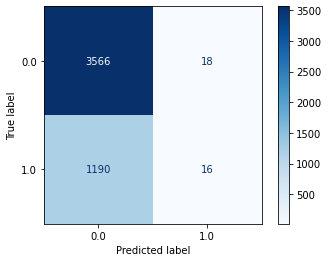

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap=plt.cm.Blues)
pass

# 9. Общие выводы

Для выполнении задания был использован датасет HR Analytics: Job Change of Data Scientists. Была задача определить, кто из кандидатов, прошедших обучение в компании, хочет работать в этой компании после обучения или ищет новую работу.

В ходе работы были выполнены следующие задачи:

*  Описана задача
*Прочитаны данные
*Визуализированы данные и вычислены основные характеристики
*Обработаны пропущенные значения
*Обработаны категориальные признаки
*Проведена нормализация
*Данные разбиты на обучающую и тестовую выборки
*Запущен классификатор ближайших соседей для разных количеств
*Вычислена ошибка на обучающей и тестовой выборках - сделаны выводы

Датасет имеет несбалансированные классы: 75/25 - люди, не ищущие смену работы/люди, ищущие смену работы

Классификатор ближайших соседей был запущен при разных значениях параметра k - числа соседей с целью определить оптимальный.Оптимальное число соседей: 55. Ошибка на тестовой выборке при этом параметре:  0.24979132865397768, причем большая часть ошибок вида  – false negative (людей, которые ищут работу, относят к тем, кто не ищет).

Данный метод классификации объектов не подходит для данной задачи, т.к ошибка классификации объектов достаточно большая.

**ДЗ к 26.12.2022**

# Обучить логистическую регрессию, RandomForest, полносвязную (неглубокую - 1-2 скрытых слоя) нейронную сеть.

1.1 Логистическая регрессия

In [63]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
Y_train_predict = lg.predict(X_train)
Y_test_predict = lg.predict(X_test)

err_train = np.mean(y_train != Y_train_predict)
err_test  = np.mean(y_test  != Y_test_predict)

print(err_train, err_test)

0.2227867483296214 0.22964509394572025


Ошибка на обучающей выборке: 0.2227867483296214

Ошибка на тестовой выборке: 0.22964509394572025

Матрица рассогласования:

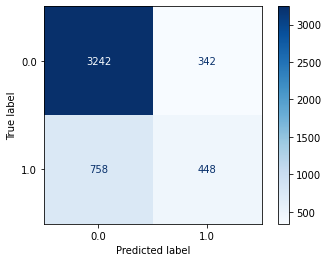

In [83]:
ConfusionMatrixDisplay.from_estimator(lg, X_test, y_test, cmap=plt.cm.Blues)

В данном примере с помощью логистической регрессии намного лучше определяются люди, которые которые ищут смену работы (true positive) - в knn это 16, здесь это 448; ошибка false negative стала меньше, но ошибка вида false positive заметно увеличилась - то есть тех, кто не ищет смену работы, принимают за тех, кто ищет. В knn это 18, здесь это 342.

1.2 RandomForest


In [70]:
from sklearn.ensemble import RandomForestClassifier

hidden_layer = np.arange(1, 30)
depth = np.arange(1, 30)
test_err = []
train_err = []
for d in depth:
    rd_forest_model = RandomForestClassifier(max_depth = d)
    rd_forest_model.fit(X_train, y_train)

    Y_train_pred = rd_forest_model.predict(X_train)
    Y_test_pred = rd_forest_model.predict(X_test)
    train_err.append(np.mean(y_train != Y_train_pred))
    test_err.append(np.mean(y_test != Y_test_pred))

График зависимости ошибки от количества нейронов:

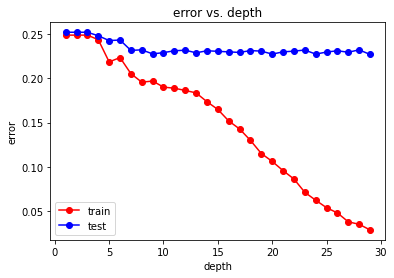

In [71]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('error vs. depth')
plt.xlabel('depth')
plt.ylabel('error')
plt.legend()

Минимальная ошибка на обучающей и тестовой выборках:

In [72]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.028953229398663696 0.2267223382045929


Максимальная глубина дерева, когда достигается наименьшая ошибка:

In [73]:
opt_dep = depth[test_err == min_test_err]
print(opt_dep)

[29]


Для лучшего значения ошибки на тестовой выборке построим матрицу рассогласования.

In [74]:
rd_forest_model = RandomForestClassifier(max_depth = 29)
rd_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=29)

Матрица рассогласования:

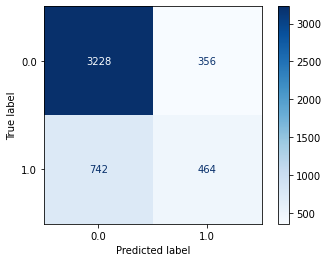

In [85]:
ConfusionMatrixDisplay.from_estimator(rd_forest_model, X_test, y_test, cmap=plt.cm.Blues)

По сравнению с логистической регрессией количество true positive возросло, количество false positive немного увеличилось, а количество false negative немного уменьшилось.



1.3 Полносвязная нейронная сеть

Будем использовать 1 скрытый слой. Найдем оптимальное количество нейронов в слое.

In [76]:
from sklearn.neural_network import MLPClassifier

hidden_layer = np.arange(1, 30)
test_err = []
train_err = []
for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neu, ), random_state = 42, max_iter = 10000)
    mlp_model.fit(X_train, y_train)

    Y_train_pred = mlp_model.predict(X_train)
    Y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != Y_train_pred))
    test_err.append(np.mean(y_test != Y_test_pred))

График зависимости ошибки от количества нейронов:

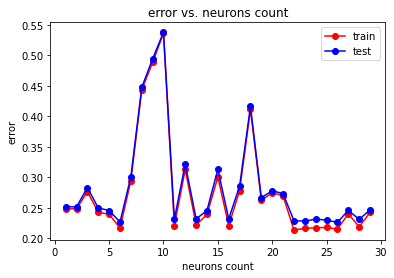

In [77]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()

Найдем минимальную ошибку на тестовой выборке:

In [78]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.2139476614699332 0.22630480167014613


Найдем количество нейронов, при котором достигается наименьшая ошибка:

In [79]:
opt_neuron = hidden_layer[test_err == min_test_err]
print(opt_neuron)

[26]


Наименьшая ошибка в тестовой выборке достигается при 26 нейронах в слое.

Построим матрицу рассогласования для данного случая.

In [80]:
mlp_model = MLPClassifier(hidden_layer_sizes = (26, ), random_state = 42, max_iter = 10000)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(26,), max_iter=10000, random_state=42)

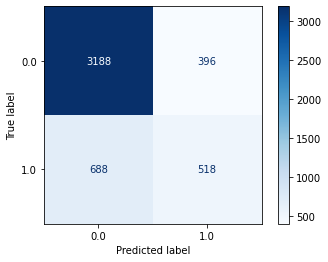

In [86]:
ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap=plt.cm.Blues)

Здесь лучше определяет true positive по сравнению с другими классификаторами, но хуже true negative.

**Выводы**

Сравним ошибки на тестовых выборках у рассмотренных классификаторов:

knn: 0.2521920668058455

лог. регрессия: 0.22964509394572025

rand forest: 0.2267223382045929

нейронная сеть: 0.22630480167014613

Наименьшая ошибка на тестовой выборке наблюдается у нейронной сети.


Сравним матрицы рассогласования:

Text(0.5, 1.0, 'полносвязная нейронная сеть')

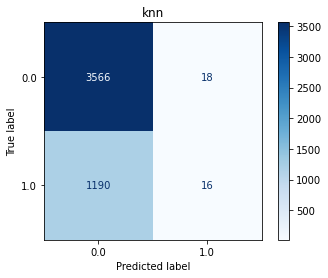

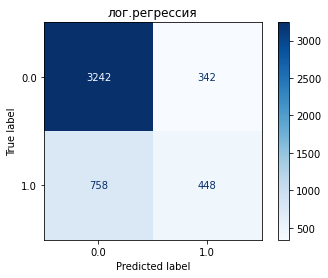

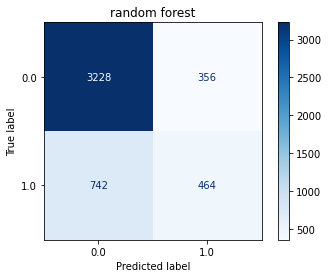

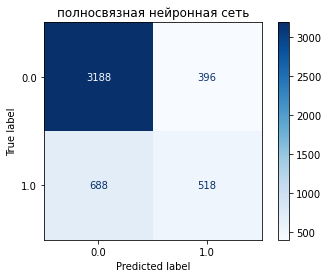

In [92]:
disp1 = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title("knn")

disp2 = ConfusionMatrixDisplay.from_estimator(lg, X_test, y_test, cmap=plt.cm.Blues)
disp2.ax_.set_title("лог.регрессия")

disp3 = ConfusionMatrixDisplay.from_estimator(rd_forest_model, X_test, y_test, cmap=plt.cm.Blues)
disp3.ax_.set_title("random forest")

disp4 = ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap=plt.cm.Blues)
disp4.ax_.set_title("полносвязная нейронная сеть")

Полносвязная нейронная сеть лучше других рассмотренных классификаторов определяет тех людей, которые ищут смену работы (true positive), но хуже справляется с true negative.

Людей, ищущих работу, определяет с точностью 518/(518+688)=~43%.

В knn это ~1.3%, в лог.регрессии - ~37%, в random forest - ~38%.